In [1]:
# Main libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

# Data Scaling using a Gaussian distribution,
from sklearn.preprocessing import StandardScaler

# Split data
from sklearn.model_selection import train_test_split

# Different algorithms for Regression Problem
from sklearn.linear_model import LinearRegression

from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

# All the important score function FOR R PROBLEMS !!!!
from sklearn.metrics import mean_squared_error, r2_score

# Configurer l'affichage pour ne pas utiliser la notation scientifique
pd.set_option('display.float_format', lambda x: '%.6f' % x)

2024-01-09 22:15:26.509365: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# All the important score function FOR CLASSIFICATION PROBLEMS !!!!
from sklearn.metrics import classification_report, accuracy_score 
from sklearn.metrics import precision_score, recall_score 
from sklearn.metrics import f1_score, matthews_corrcoef 
from sklearn.metrics import confusion_matrix 

In [3]:
df = pd.read_csv('stockmarket.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.000000,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.420000,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.920000,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.100000,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.000000,15.830000,16.110001,16.110001,6866900


In [4]:
df.shape

(2416, 7)

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,2416.000000,186.271147,118.740163,16.139999,34.342498,213.035004,266.450012,673.690002
High,2416.000000,189.578224,120.892329,16.629999,34.897501,216.745002,270.927513,786.140015
Low,2416.000000,182.916639,116.857591,14.980000,33.587501,208.870002,262.102501,673.520020
Close,2416.000000,186.403651,119.136020,15.800000,34.400002,212.960007,266.774994,780.000000
Adj Close,2416.000000,186.403651,119.136020,15.800000,34.400002,212.960007,266.774994,780.000000
Volume,2416.000000,5572721.688742,4987809.151888,118500.000000,1899275.000000,4578400.000000,7361150.000000,47065000.000000


## 1) Data Prepocessing

In [6]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

array([[<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
        <Axes: xlabel='Date'>],
       [<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
        <Axes: xlabel='Date'>],
       [<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
        <Axes: xlabel='Date'>]], dtype=object)

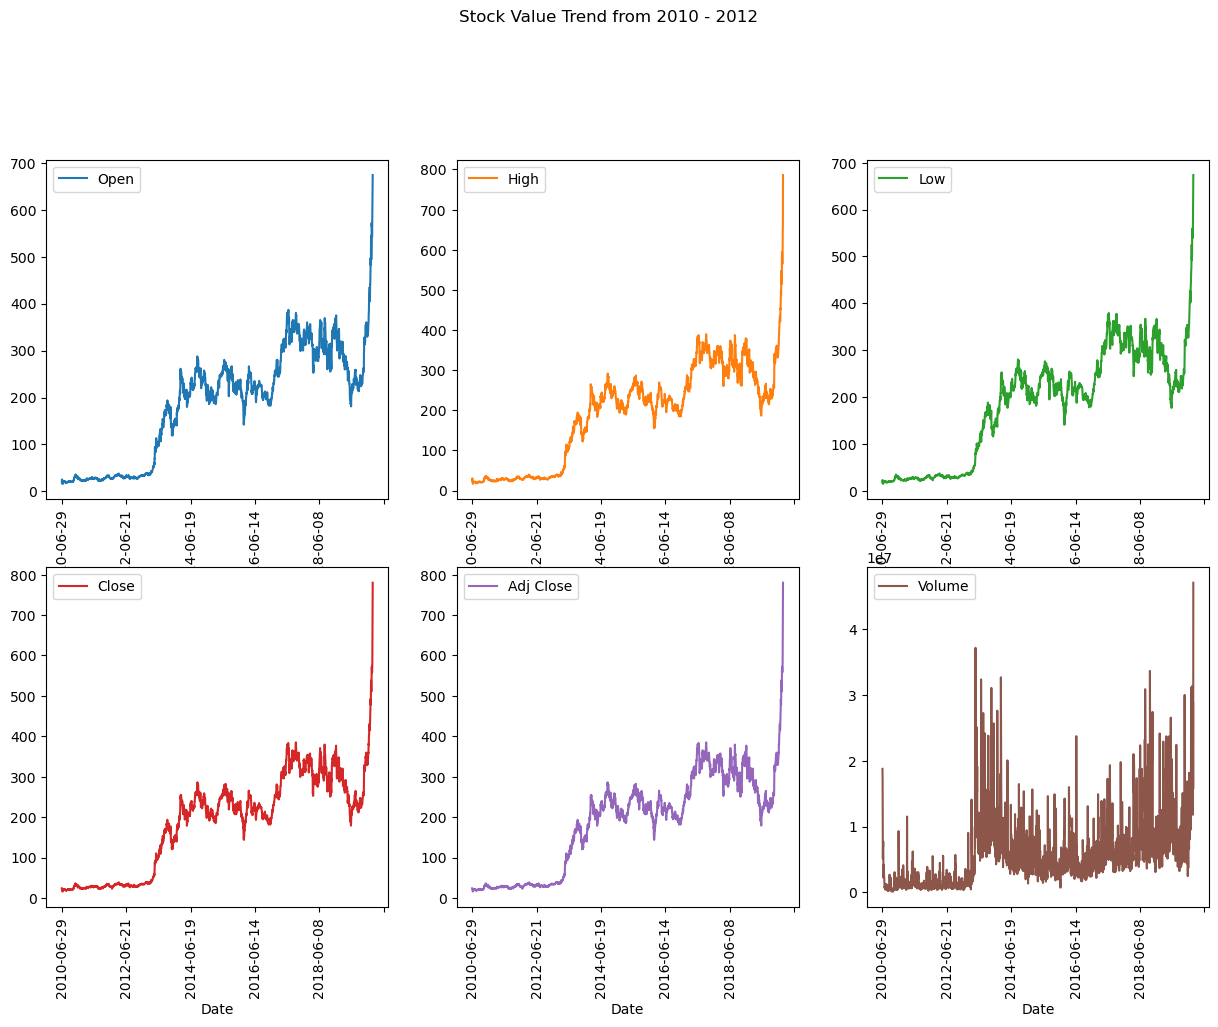

In [7]:
# A glimpse of how the market shares varied over the given time

# Create a list for numerical columns that are to be visualized
Column_List = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']


# Plot to view the same
df.plot(x = 'Date', y = Column_List, subplots = True, layout = (3, 3), figsize = (15, 15), sharex = False, title = "Stock Value Trend from 2010 - 2012", rot = 90)

In [8]:
df_noDate = df.drop(['Date'], axis = 1)
df_noDate.head()

,Open,High,Low,Close,Adj Close,Volume
0,19.000000,25.000000,17.540001,23.889999,23.889999,18766300
1,25.790001,30.420000,23.299999,23.830000,23.830000,17187100
2,25.000000,25.920000,20.270000,21.959999,21.959999,8218800
3,23.000000,23.100000,18.709999,19.200001,19.200001,5139800
4,20.000000,20.000000,15.830000,16.110001,16.110001,6866900


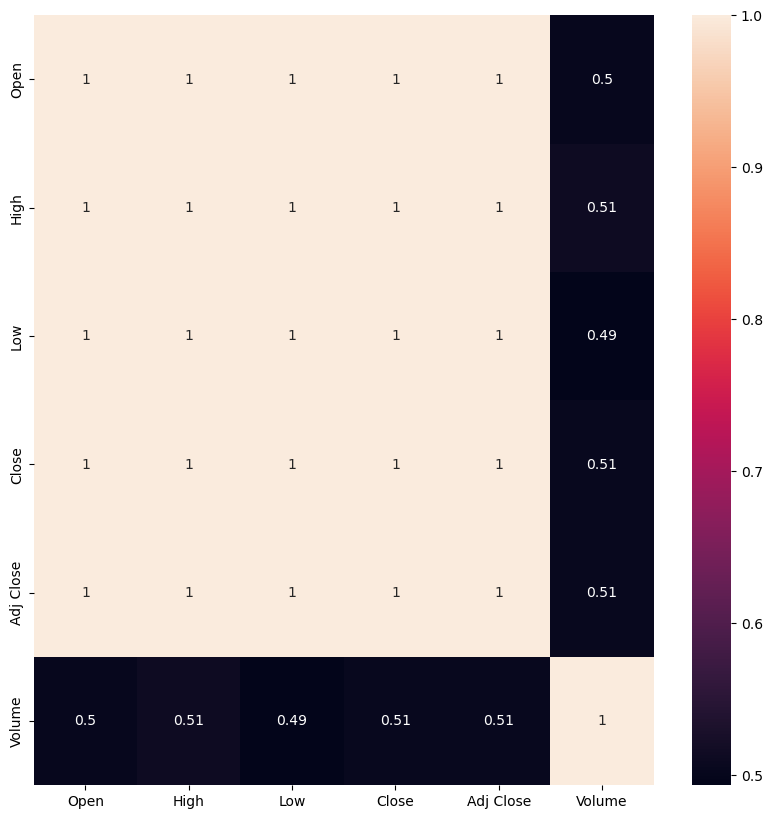

In [9]:
# checking correlation between features
plt.figure(figsize=(10,10))
sb.heatmap(df_noDate.corr(), annot=True)
plt.show()
# There exist a perfect correlations between all the features so we will first keep all of them and train a model on it
# and after we will try combinations keeping one correlated feature "Open" and one not correlated "Volume"

array([[<Axes: title={'center': 'Open'}>,
        <Axes: title={'center': 'High'}>],
       [<Axes: title={'center': 'Low'}>,
        <Axes: title={'center': 'Close'}>],
       [<Axes: title={'center': 'Adj Close'}>,
        <Axes: title={'center': 'Volume'}>]], dtype=object)

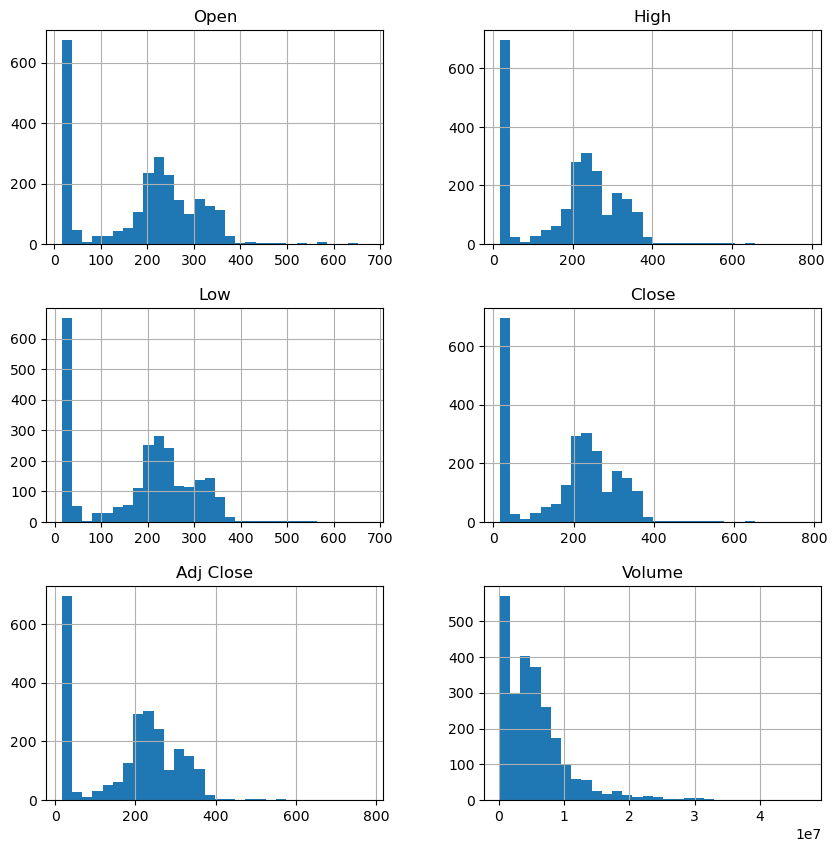

In [10]:
# check the range for scaling or not
df_noDate.hist(bins = 30, figsize= (10,10))
# We will envisage Data Scaling because og the scale of volume

## 2) Train Data

In [11]:
X = np.array(df_noDate.drop(['Close','Adj Close'], axis = 1))
y = np.array(df_noDate['Close'])

In [12]:
x_train, x_test, y_train, y_test = train_test_split(X,y)
x_train.shape, x_test.shape

((1812, 4), (604, 4))

In [19]:
# Trtaining the model with LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
y_train_predict = lr.predict(x_train)
y_test_predict = lr.predict(x_test)

# Evaluating the model
mse_train = mean_squared_error(y_train, y_train_predict)
mse_test = mean_squared_error(y_test, y_test_predict)

r2_train = r2_score(y_train, y_train_predict)
r2_test = r2_score(y_test, y_test_predict)


print("The model used is Linear Regression")

print("Mean Squared Error for Training Set: {}".format(mse_train))
print("Mean Squared Error for Test Set: {}".format(mse_test))
print("R-squared for Training Set: {}".format(r2_train))
print("R-squared for Test Set: {}".format(r2_test))

The model used is Linear Regression
Mean Squared Error for Training Set: 4.063791168629034
Mean Squared Error for Test Set: 4.295074727542988
R-squared for Training Set: 0.9997194726225421
R-squared for Test Set: 0.9996768417880071


In [20]:
# Trtaining the model with XGBRegressor
xgb = XGBRegressor(n_estimators = 100, max_depth = 50)
xgb.fit(x_train,y_train)
y_train_pred_xgb = xgb.predict(x_train)
y_test_pred_xgb = xgb.predict(x_test)

# Evaluating the model
mse_train = mean_squared_error(y_train, y_train_pred_xgb)
mse_test = mean_squared_error(y_test, y_test_pred_xgb)

r2_train = r2_score(y_train, y_train_pred_xgb)
r2_test = r2_score(y_test, y_test_pred_xgb)


print("The model used is Linear Regression")

print("Mean Squared Error for Training Set: {}".format(mse_train))
print("Mean Squared Error for Test Set: {}".format(mse_test))
print("R-squared for Training Set: {}".format(r2_train))
print("R-squared for Test Set: {}".format(r2_test))

The model used is Linear Regression
Mean Squared Error for Training Set: 12.65450575056097
Mean Squared Error for Test Set: 21.088646526478332
R-squared for Training Set: 0.9991264474073779
R-squared for Test Set: 0.9984133059988121


In [21]:
# Training the model with XGBRegressor
reg = DecisionTreeRegressor(max_depth=15)
reg.fit(x_train, y_train)
y_train_pred_deciTree = reg.predict(x_train)
y_test_pred_deciTree = reg.predict(x_test)



# Evaluating the model
mse_train = mean_squared_error(y_train, y_train_pred_deciTree)
mse_test = mean_squared_error(y_test, y_test_pred_deciTree)

r2_train = r2_score(y_train, y_train_pred_deciTree)
r2_test = r2_score(y_test, y_test_pred_deciTree)


print("The model used is Linear Regression")

print("Mean Squared Error for Training Set: {}".format(mse_train))
print("Mean Squared Error for Test Set: {}".format(mse_test))
print("R-squared for Training Set: {}".format(r2_train))
print("R-squared for Test Set: {}".format(r2_test))

The model used is Linear Regression
Mean Squared Error for Training Set: 0.032903899088144346
Mean Squared Error for Test Set: 13.16664031707065
R-squared for Training Set: 0.9999977286124861
R-squared for Test Set: 0.9990093518244205


In [22]:
# Create a DataFrame with actual values from y_test
final_df = pd.DataFrame(y_test)

# Rename the column to 'Close' for clarity
final_df.rename(columns={final_df.columns[0]: 'Close_Original'}, inplace=True)

# Add the predicted values
final_df['Close_Predict'] = y_test_predict

In [23]:
final_df.head()

,Close_Original,Close_Predict
0,31.840000,31.358675
1,19.200001,19.761981
2,310.119995,308.291609
3,151.160004,153.304879
4,18.320000,17.961574
